In [1]:
import sys
python_path = ['/home/chao/cantera/build/python', '/home/chao/RMG-Py', '/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages', '/home/chao/cantera', '/home/chao/anaconda3/envs/rmg_env/lib/python37.zip', '/home/chao/anaconda3/envs/rmg_env/lib/python3.7', '/home/chao/anaconda3/envs/rmg_env/lib/python3.7/lib-dynload', '/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/chemprop-0.0.1-py3.7.egg', '/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/descriptastorus-2.0.0.32-py3.7.egg']
sys.path.clear()
for path in python_path:
    sys.path.append(path)

In [2]:
from __future__ import division
from __future__ import print_function
import yaml
import cantera as ct
import scipy.optimize
import numpy as np
import pandas as pd
from textwrap import wrap
import time

import cantera as ct
print('Runnning Cantera version: ' + ct.__version__)

# %matplotlib notebook
import matplotlib.pyplot as plt

Runnning Cantera version: 2.6.0a2


In [3]:
with open("cpox_cov.yaml", 'r') as f:
    model = yaml.load(f, Loader=yaml.FullLoader)

In [4]:
def get_Ea_from_E0_dH(E0, dHrxn, w0=1e9):
        """
        Return the activation energy in J/kmol corresponding to the given
        E0, enthalpy of reaction `dHrxn`, and w0, all in J/kmol.
        """
        E0 = float(E0)
        w0 = max(w0, 2*E0)
        assert w0 >= 2*E0, f"seems to work best when w0 > 2*Eo = {2*E0/1e3:.1f} kJ/mol, but w0={w0/1e3:.1f} kJ/mol"
        
        if E0 == dHrxn == 0:
            return 0
        if dHrxn < -4 * E0:
            return 0.0
        elif dHrxn > 4 * E0:
            return dHrxn
        else:
            Vp = 2 * w0 * (2 * w0 + 2 * E0) / (2 * w0 - 2 * E0)
            return (w0 + dHrxn / 2.0) * (Vp - 2 * w0 + dHrxn) ** 2 / (Vp ** 2 - (2 * w0) ** 2 + dHrxn ** 2)

def get_E0_from_Ea_dH(i, Ea, dHrxn, w0=1e9, plot=False):
    """
    Return the E0 in J/kmol corresponding to the given Ea and dHrxn and w0 in J/kmol.
    """
    def f(E0):
        return Ea - get_Ea_from_E0_dH(E0, dHrxn, w0=w0)
    E0_guess = Ea*.5 if dHrxn>0 else max(Ea*8,30e6)
    E0 = scipy.optimize.fsolve(f, E0_guess)[0]
    #print(f"E0 = {E0}")
        
    if plot:
        plt.ioff()
        plt.clf()
        dHs = np.linspace(min(-5*E0,dHrxn),max(5*E0,dHrxn))
        Eas = np.vectorize(lambda dH: get_Ea_from_E0_dH(E0, dH, w0=w0))(dHs)
        plt.plot(dHs/1e6, Eas/1e6)
        plt.plot(dHrxn/1e6, Ea/1e6, 'ro')
        plt.plot(0,E0/1e6,'bx')
        plt.text(0,E0/1e6,f'$E_0={E0/1e6:.1f}$ kJ/mol')
        plt.title('reaction {}'.format(i))
        plt.xlabel('$\Delta H_{rxn}$ (kJ/mol)')
        plt.ylabel('$E_a$ (kJ/mol)')
        plt.show()
    
    if not np.isclose(Ea, get_Ea_from_E0_dH(E0, dHrxn), rtol=0.002):
        print(f"Warning: {Ea} not close to {get_Ea_from_E0_dH(E0, dHrxn)}")
        
    return E0

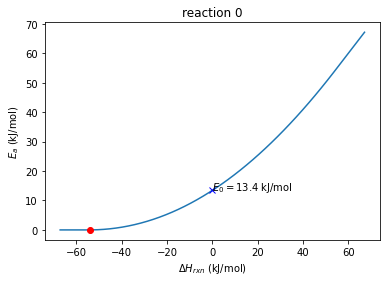

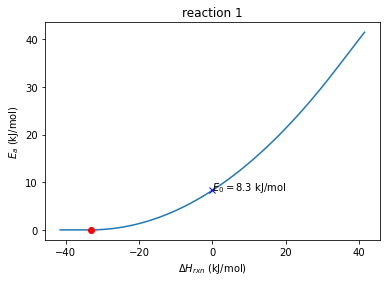

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


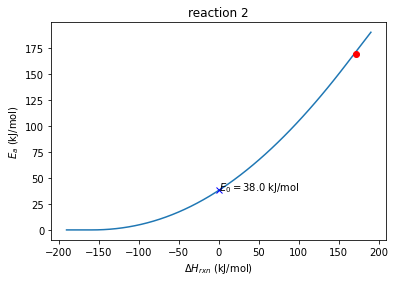

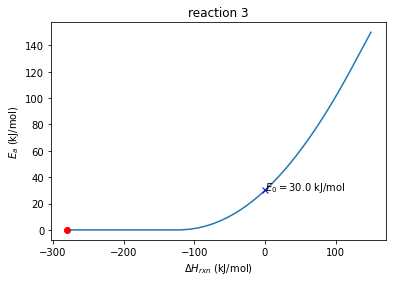

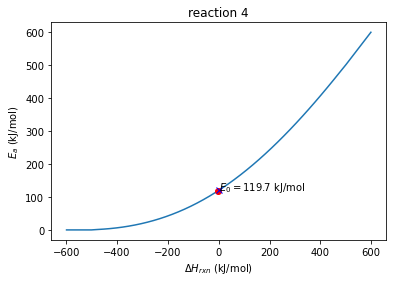

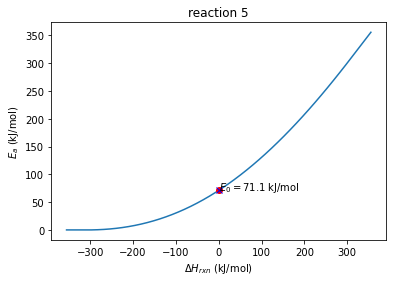

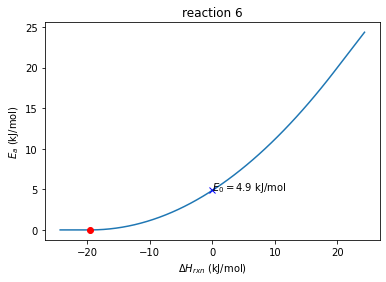

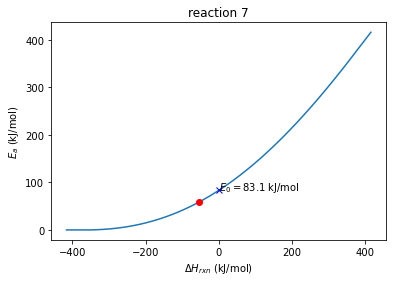

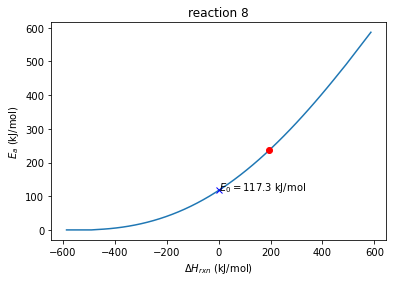

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


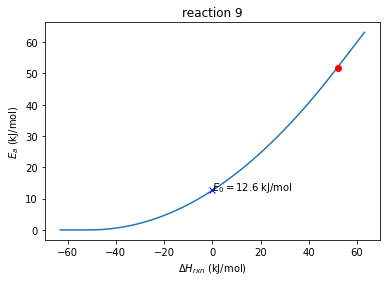

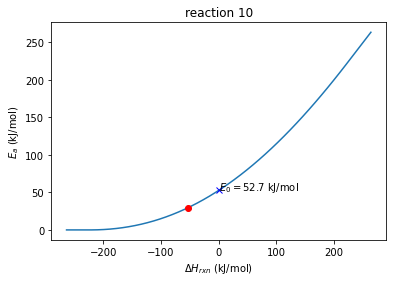

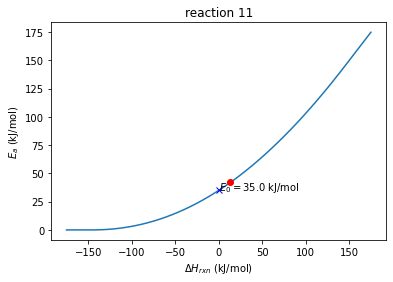

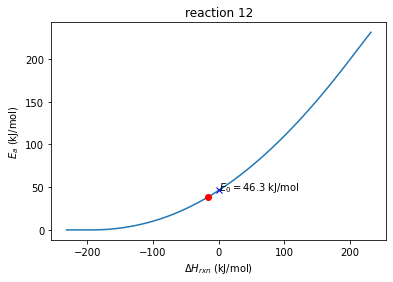

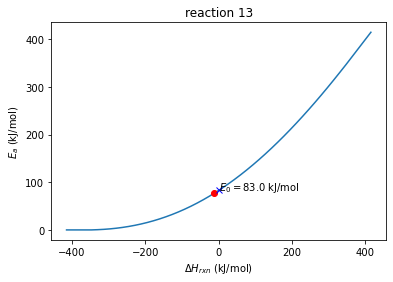

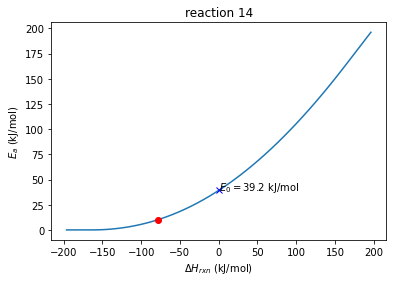

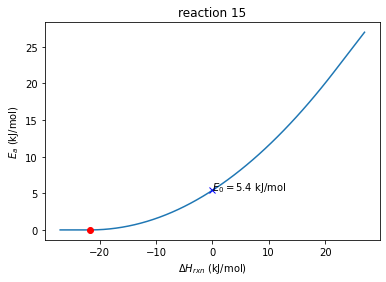

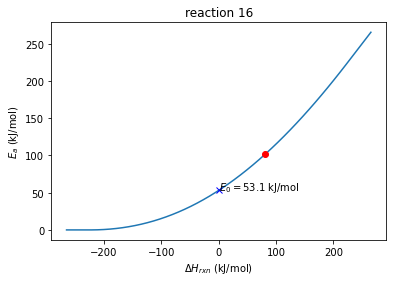

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


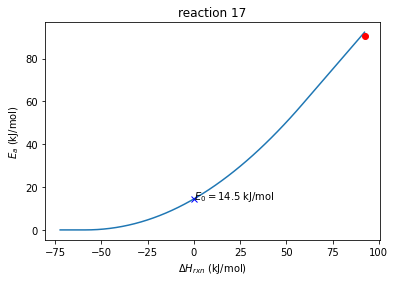

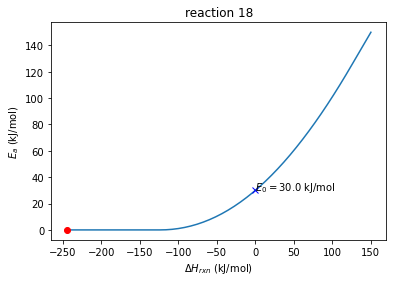

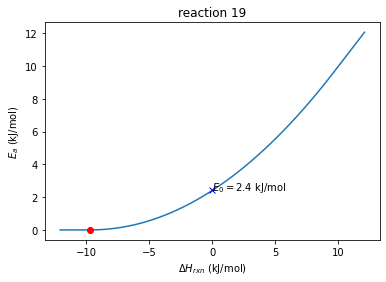

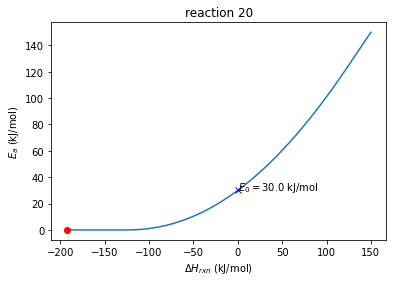

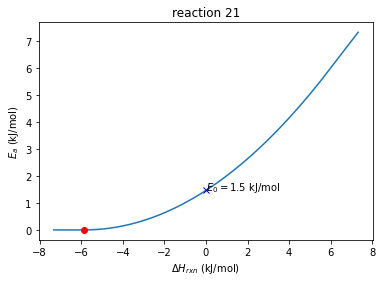

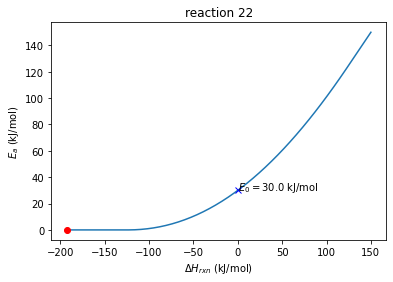

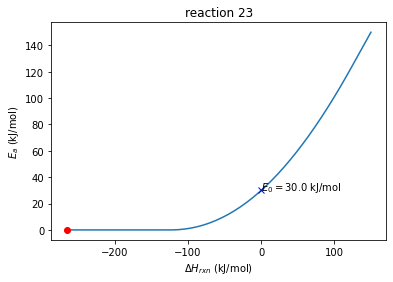

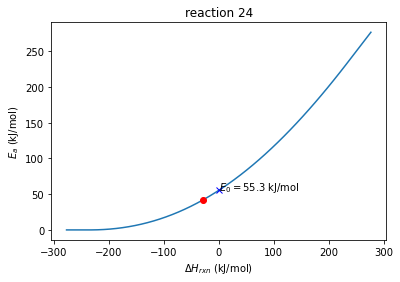

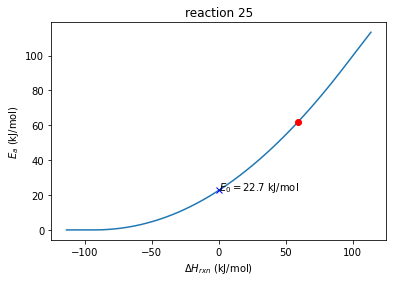

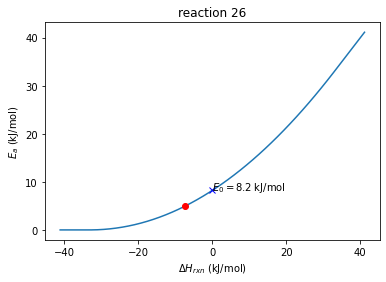

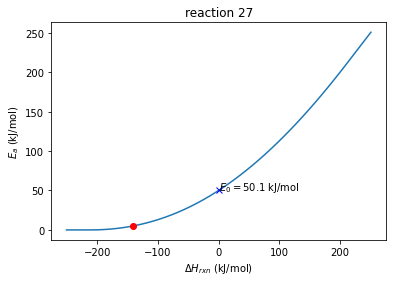

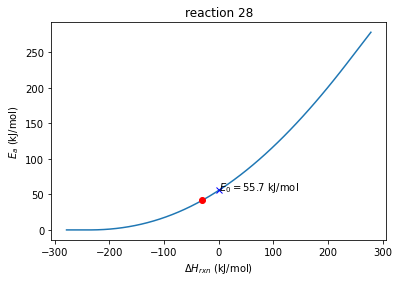

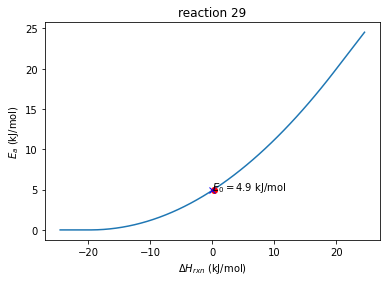

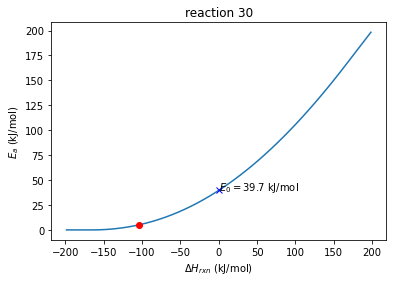

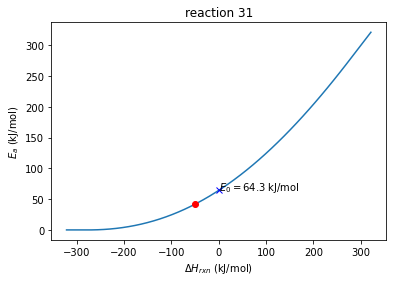

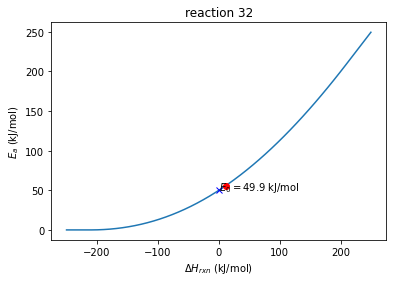

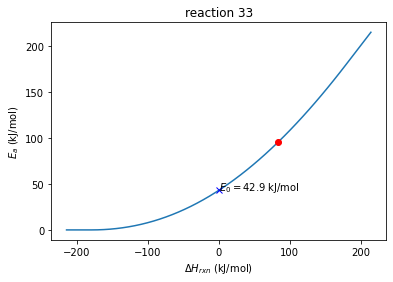

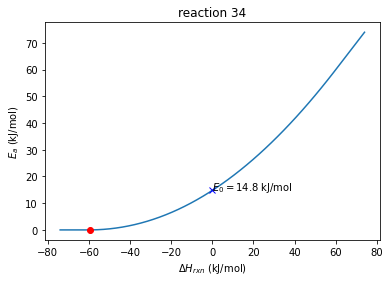

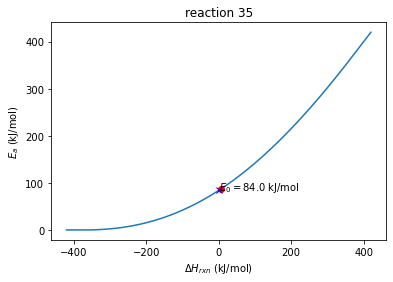

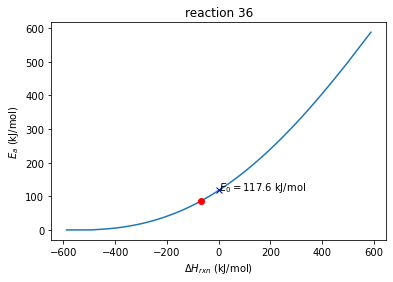

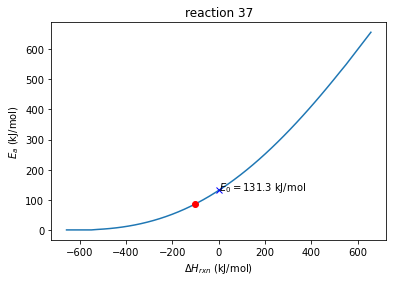

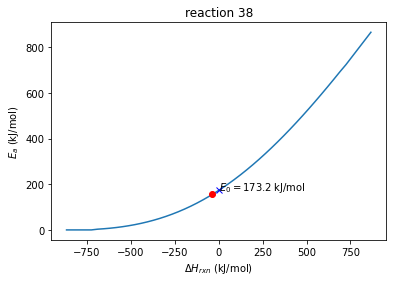

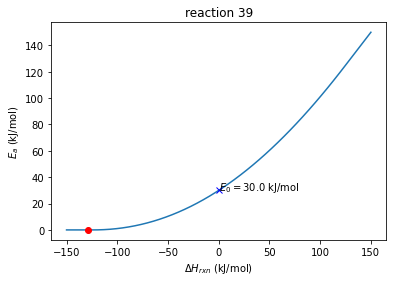

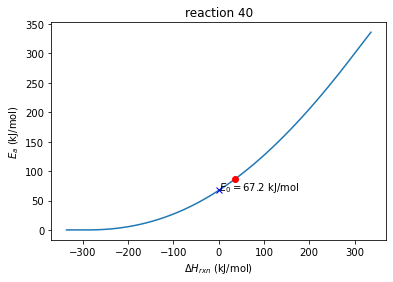

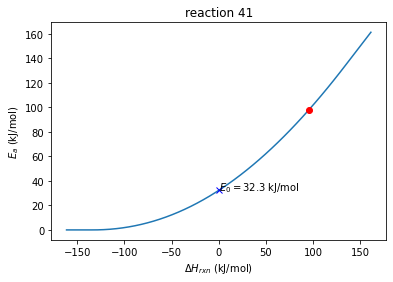

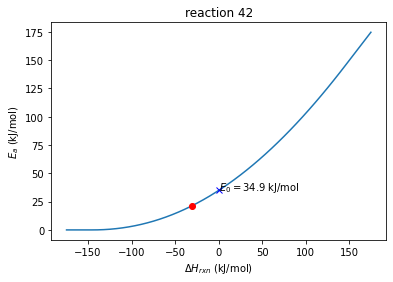

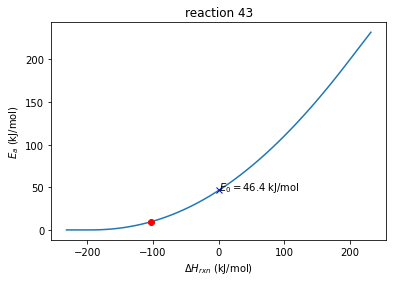

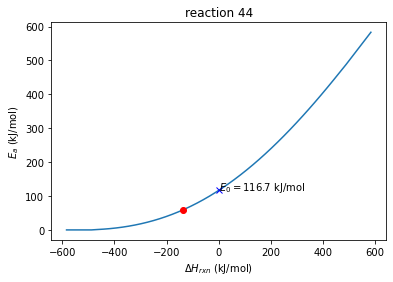

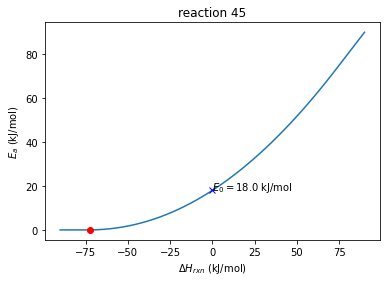

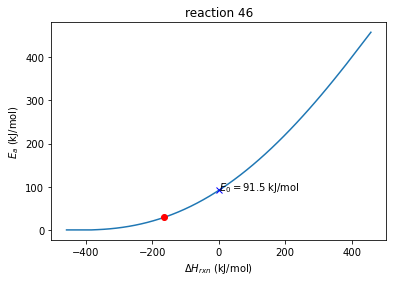

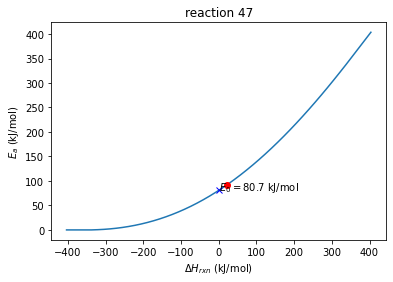

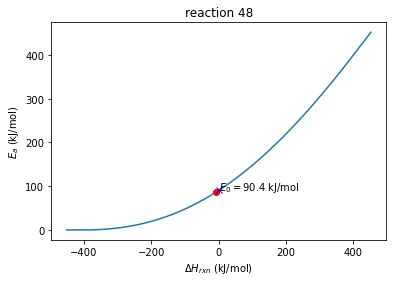

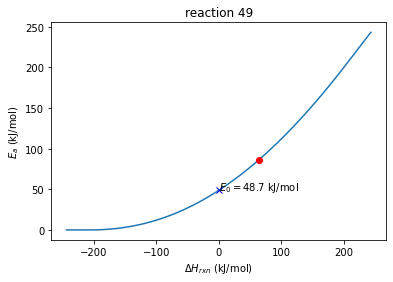

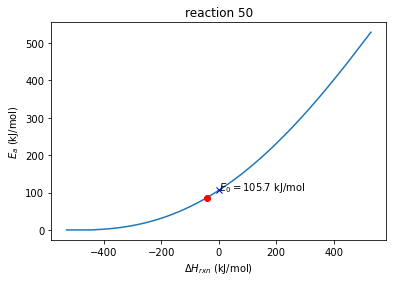

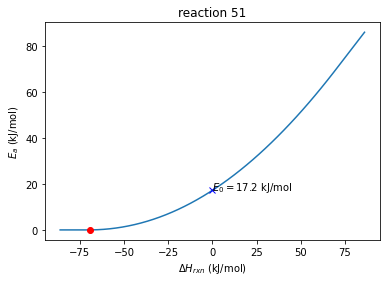

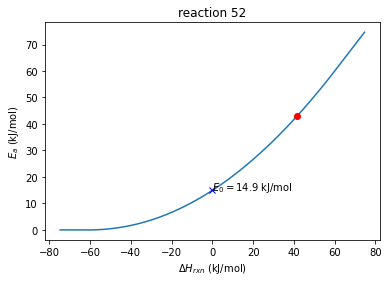

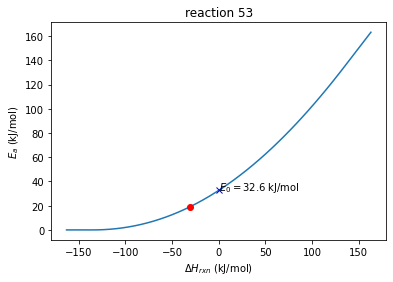

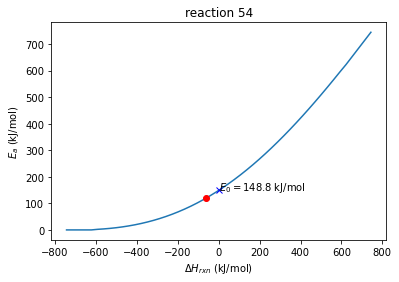

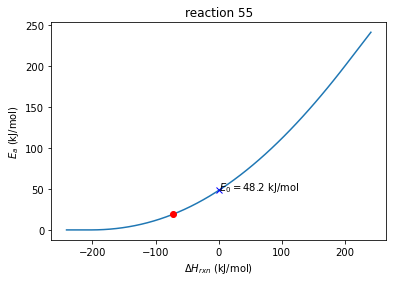

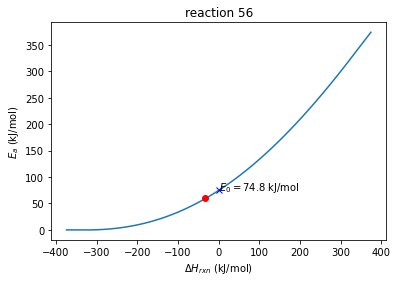

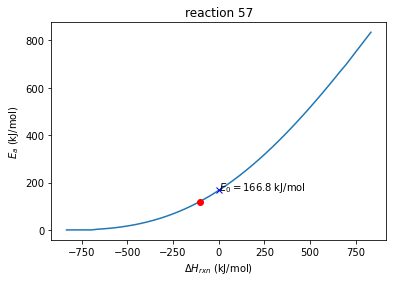

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


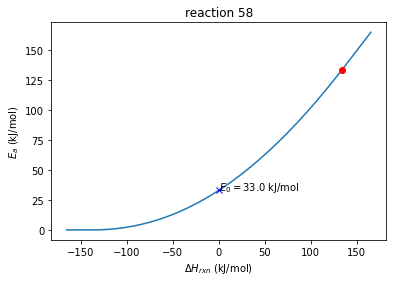

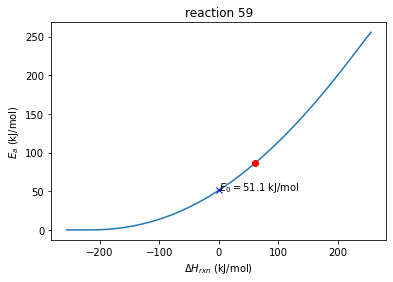

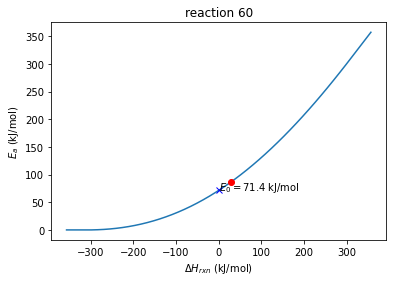

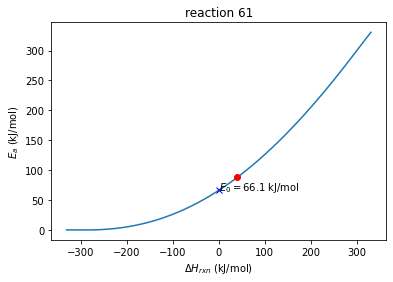

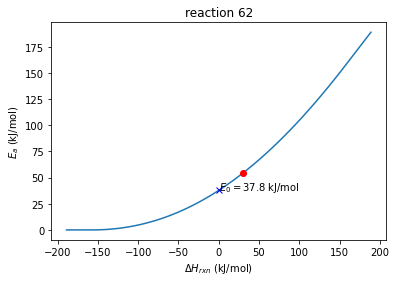

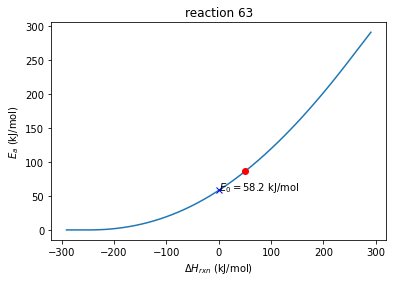

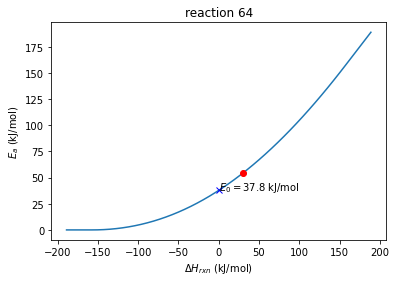

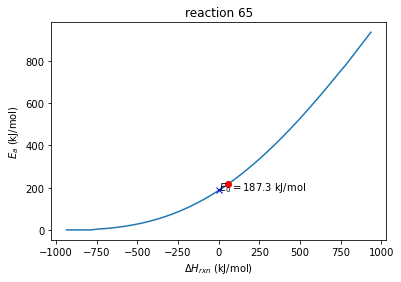

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


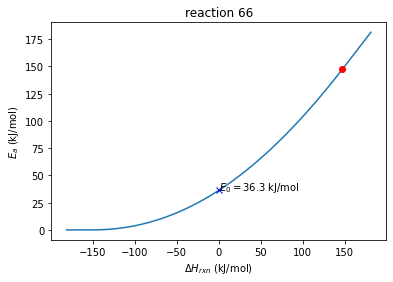

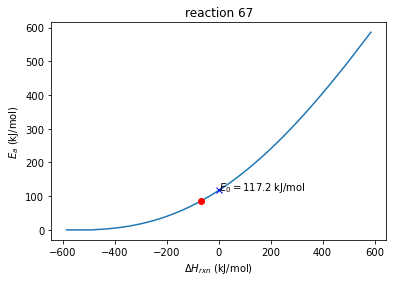

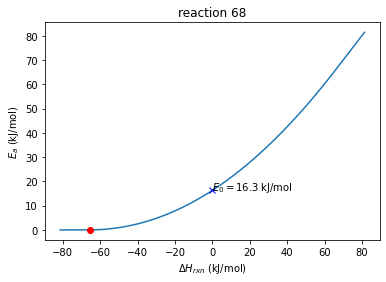

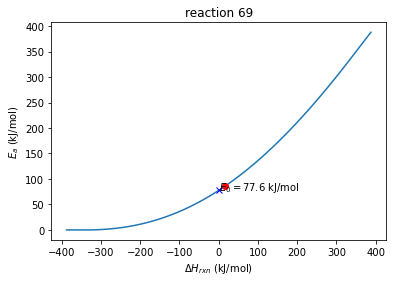

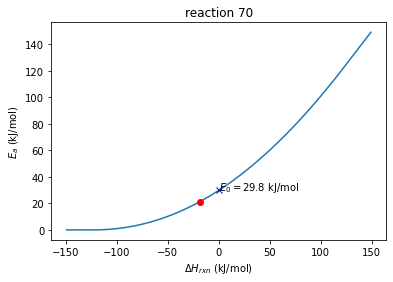

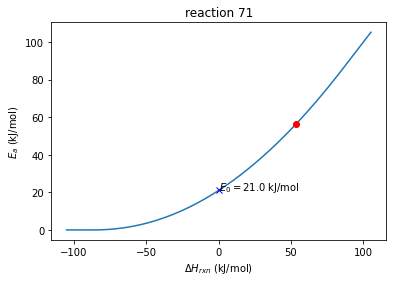

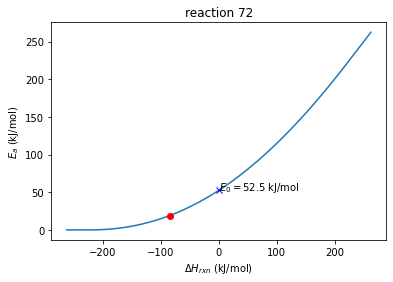

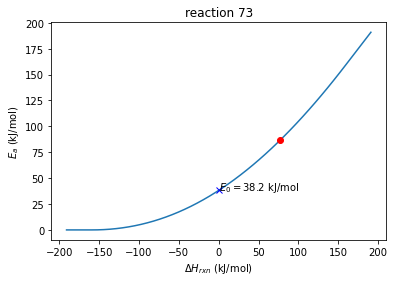

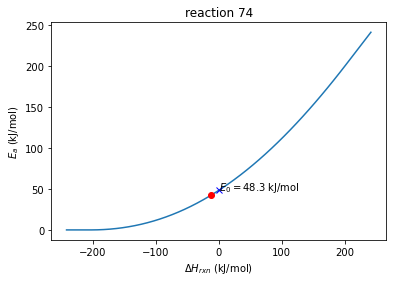

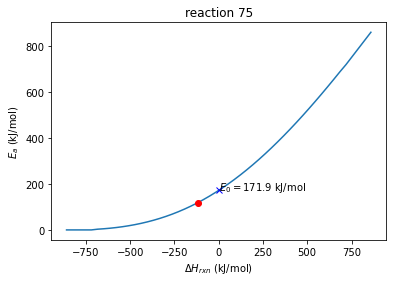

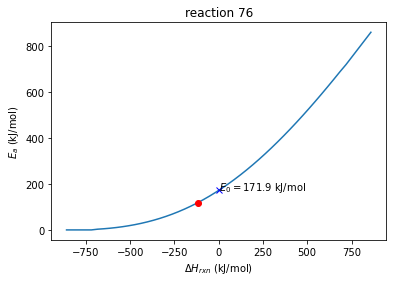

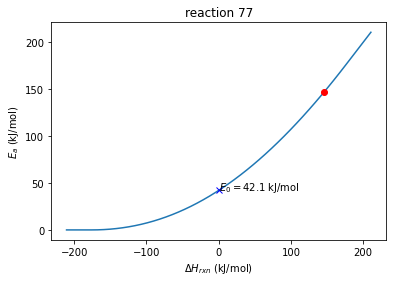

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


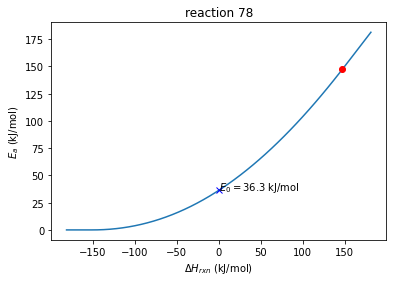

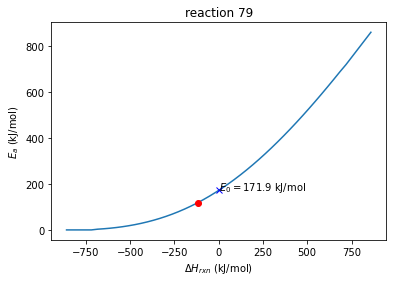

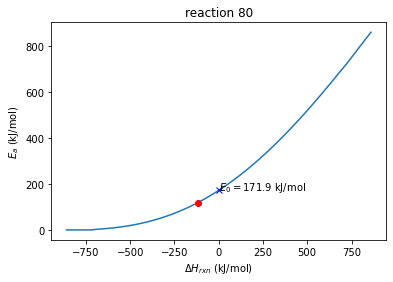

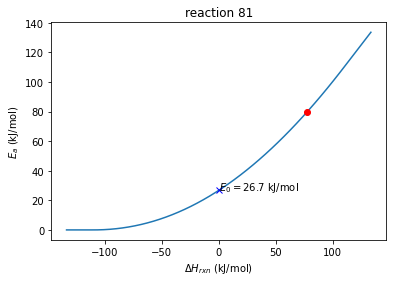

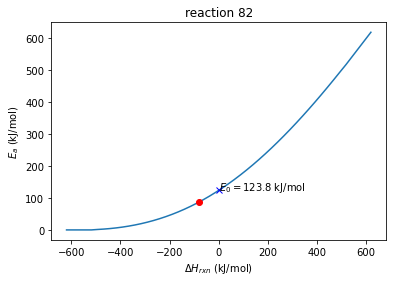

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


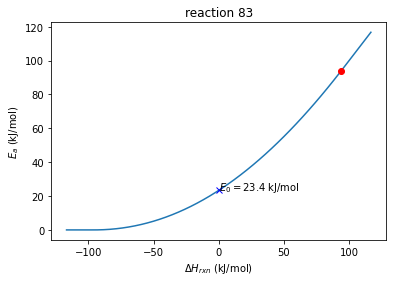

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


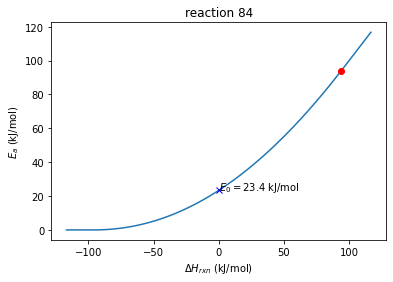

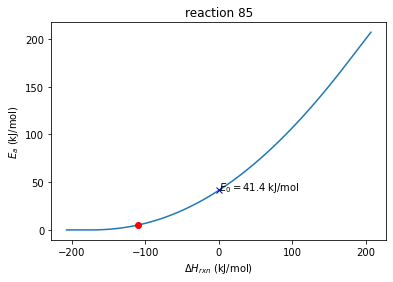

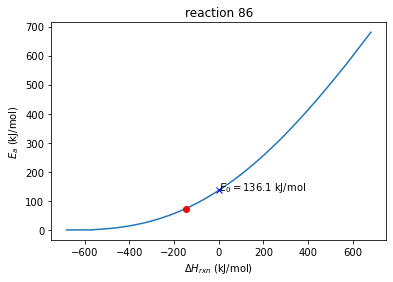

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


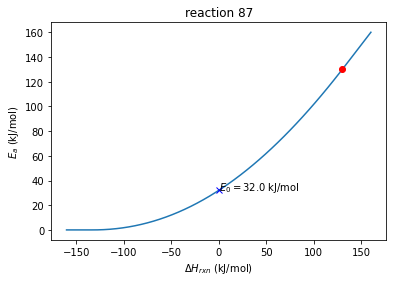

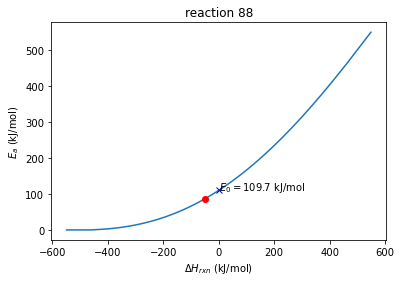

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


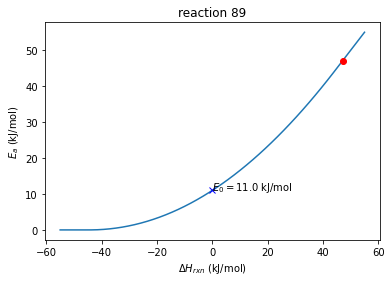

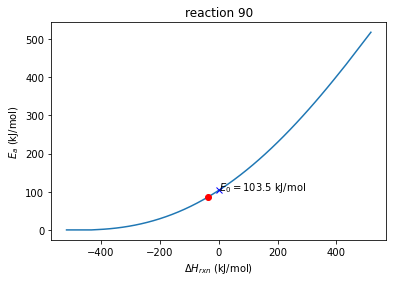

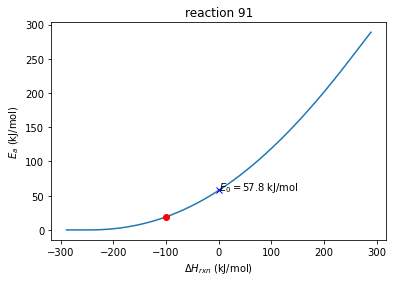

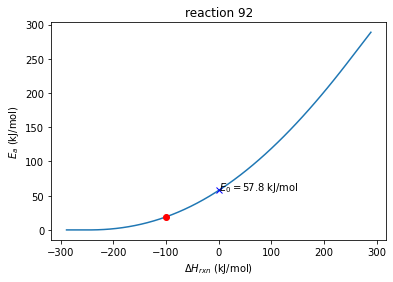

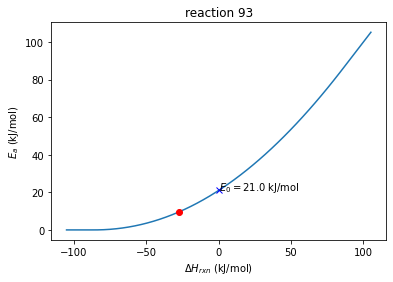

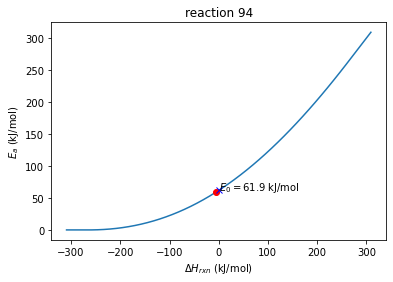

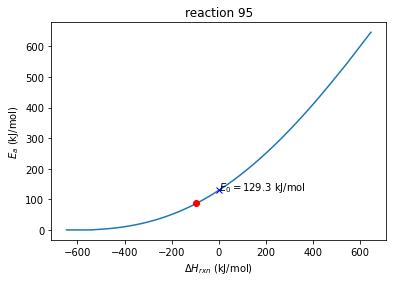

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


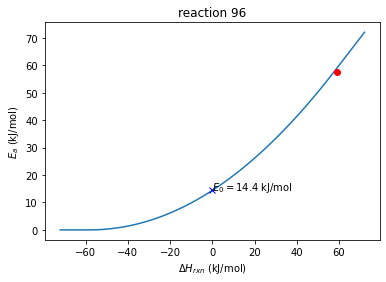

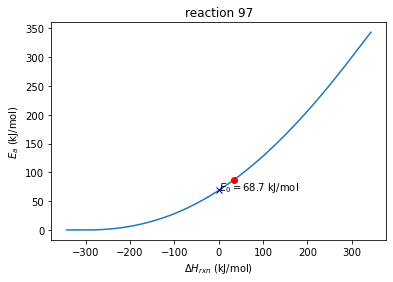

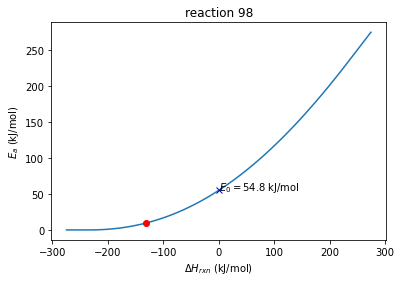

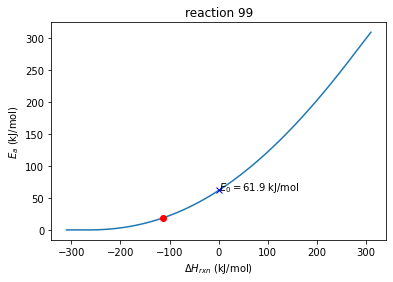

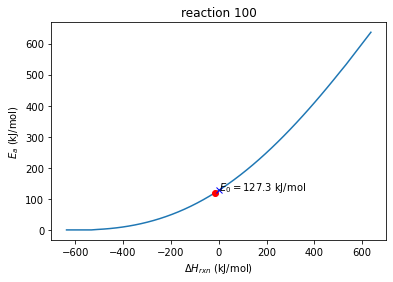

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


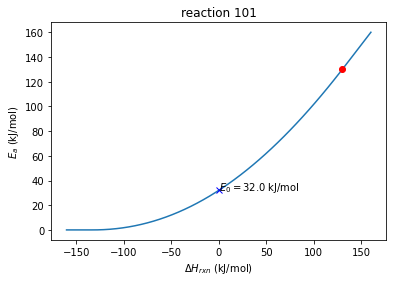

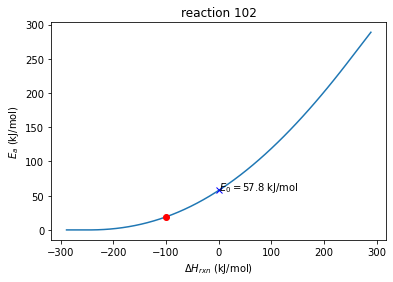

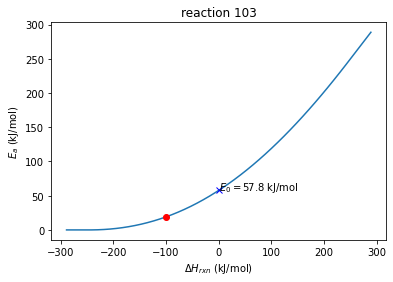

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


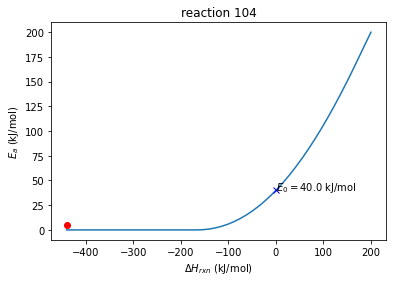

/home/chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


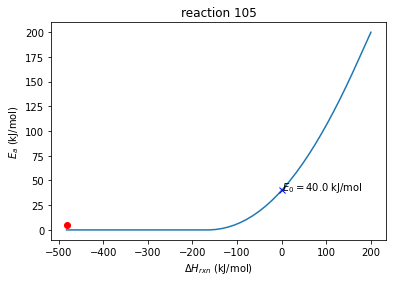

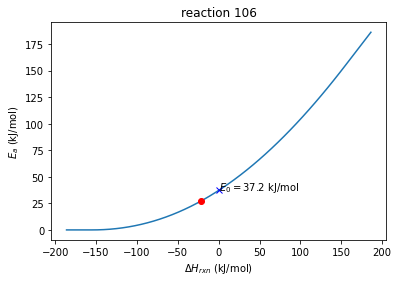

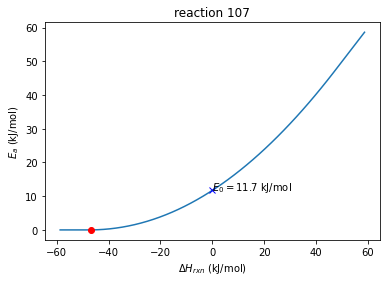

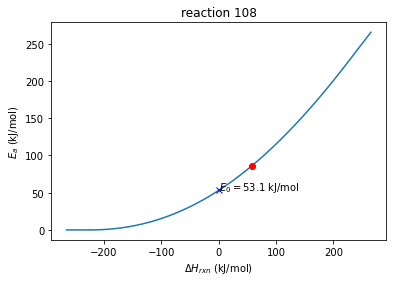

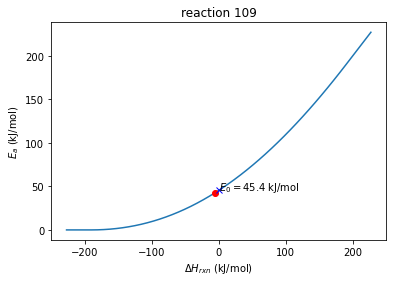

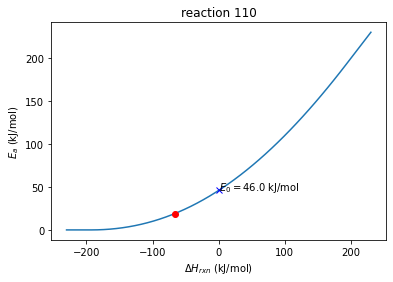

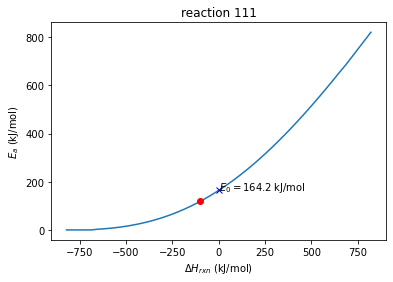

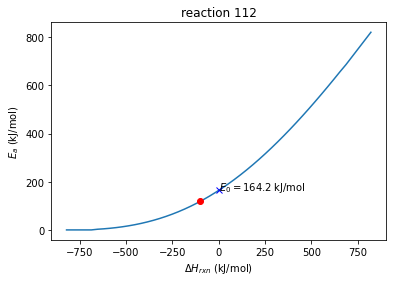

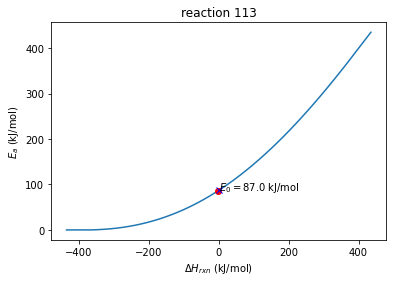

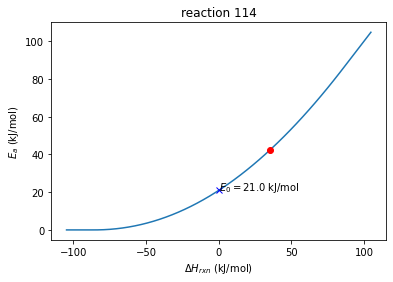

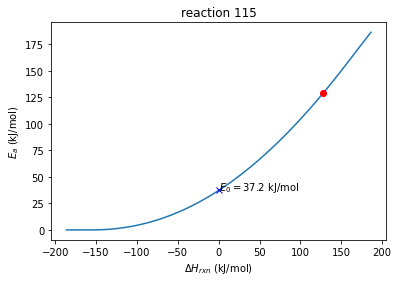

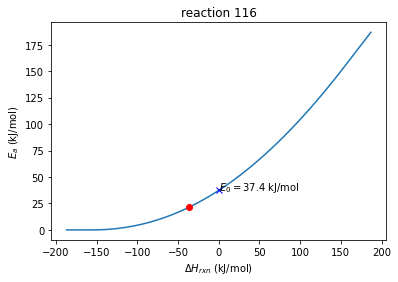

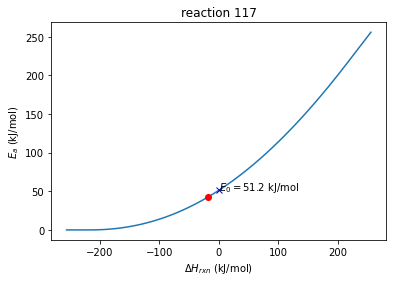

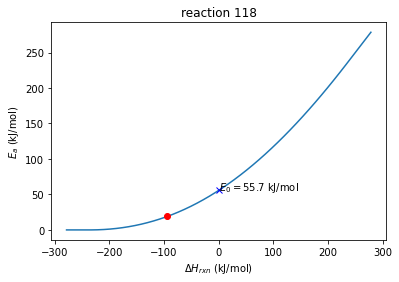

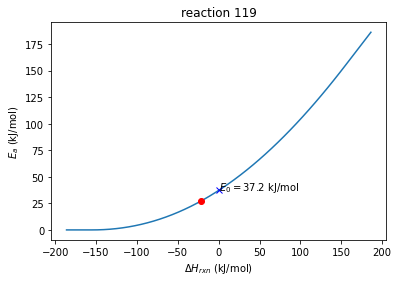

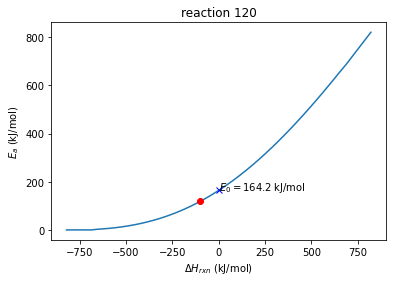

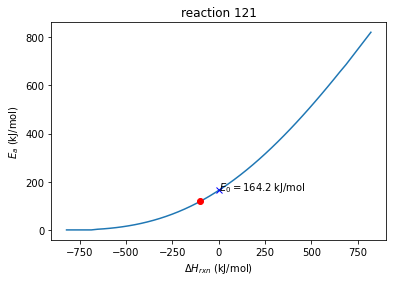

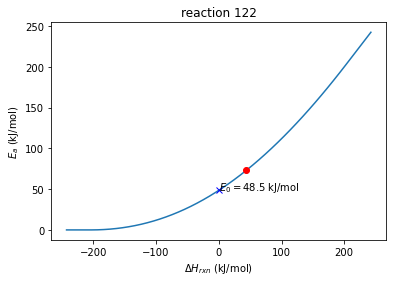

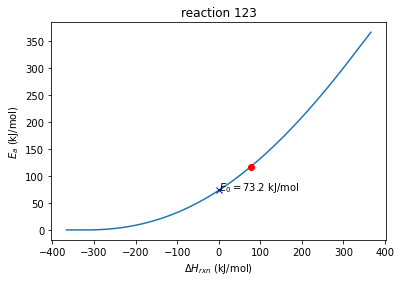

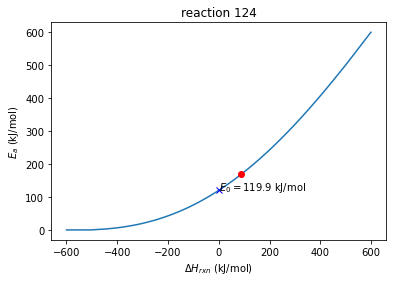

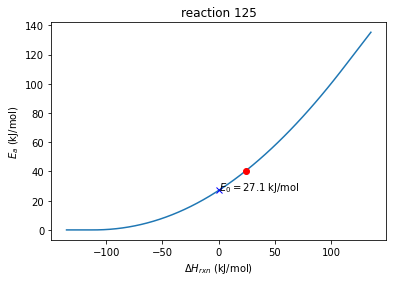

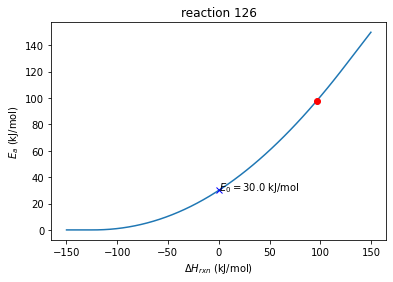

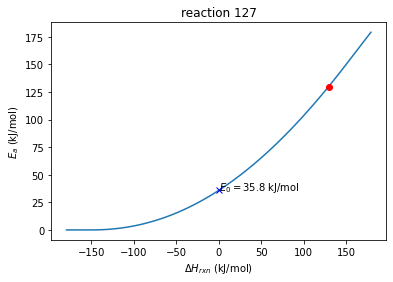

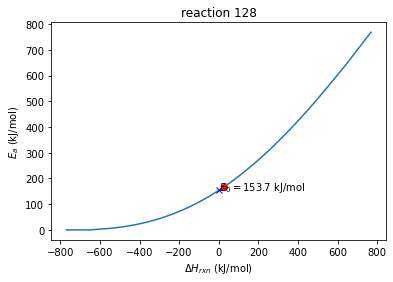

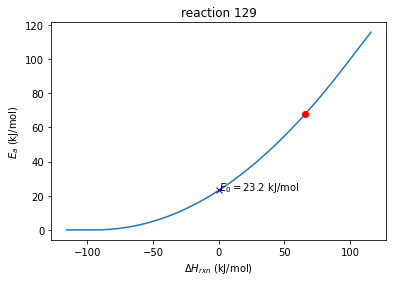

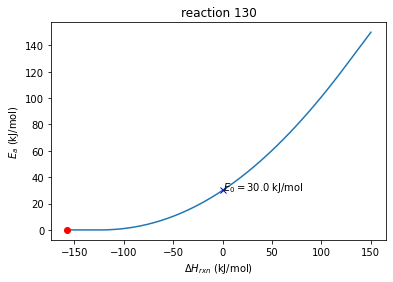

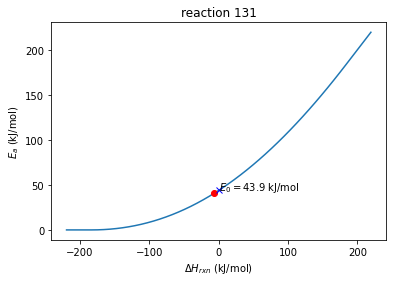

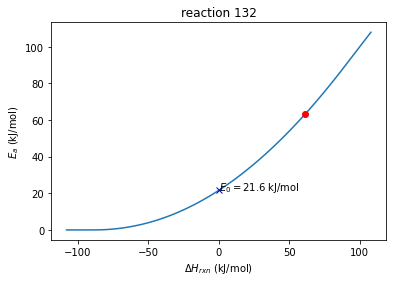

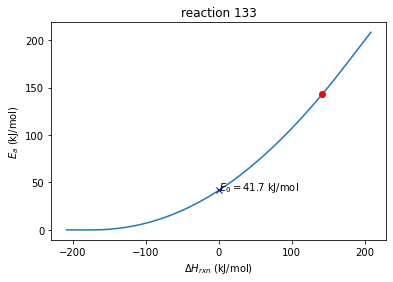

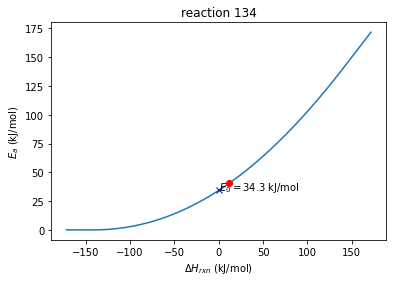

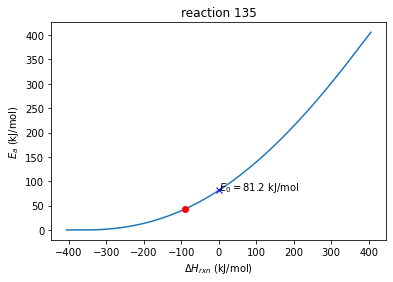

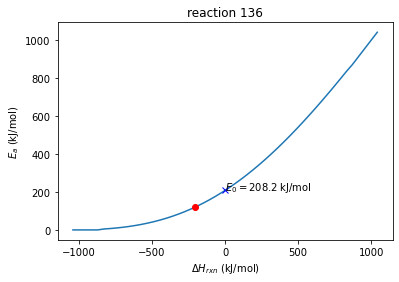

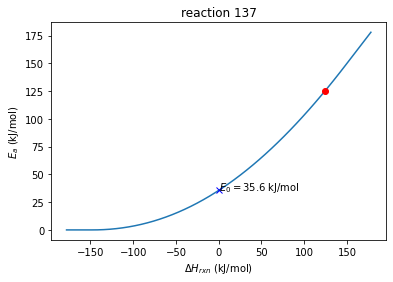

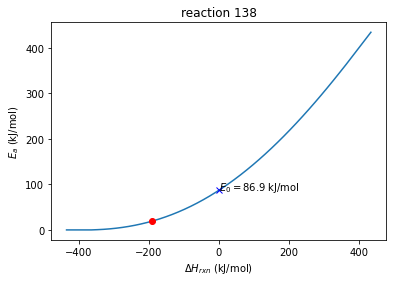

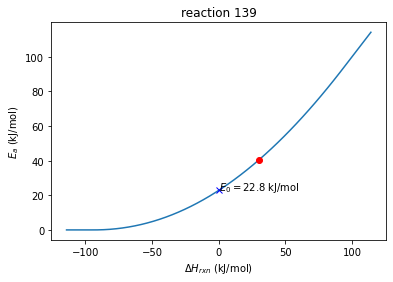

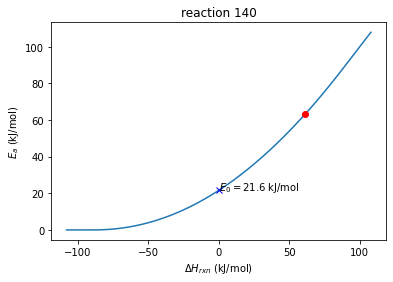

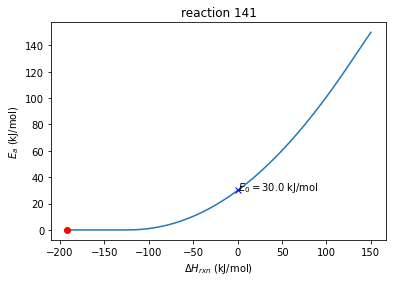

In [5]:
gas = ct.Solution('cpox_cov.yaml')
surf = ct.Interface('cpox_cov.yaml', 'surface1', [gas])
bm_rxns = []
for i in range(surf.n_reactions):
    model['surface1-reactions'][i]['type'] = 'Blowers-Masel'
    try:
        rc = model['surface1-reactions'][i]['rate-constant']
        Ea0 = get_E0_from_Ea_dH(i, surf.reaction(i).rate.activation_energy, surf.delta_enthalpy[i], w0=1e9, plot=True)
        rc['Ea0'] = float(Ea0) / 4.184e6
        rc['w'] = 1e9 / 4.184e6
        del rc['Ea']
        bm_rxns.append(model['surface1-reactions'][i])
    except KeyError:
        rc = model['surface1-reactions'][i]['sticking-coefficient']
        Ea0 = get_E0_from_Ea_dH(i, surf.reaction(i).rate.activation_energy, surf.delta_enthalpy[i], w0=1e9, plot=True)
        rc['Ea0'] = float(Ea0) / 4.184e6
        rc['w'] = 1e9 / 4.184e6
        del rc['Ea']
        bm_rxns.append(model['surface1-reactions'][i])   